In [13]:
import torch
import networkx as nx
from dgl.data import CoraGraphDataset
import matplotlib.pyplot as plt

In [11]:
def plot_graph(graph):
    graph = graph.to_networkx()
    plt.figure(figsize=(26, 12))
    nx.draw(graph, node_size=50)
    plt.show()

In [5]:
dataset = CoraGraphDataset()
graph = dataset[0]

  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.


In [10]:
A = graph.adj().to_dense()
A.shape

torch.Size([2708, 2708])

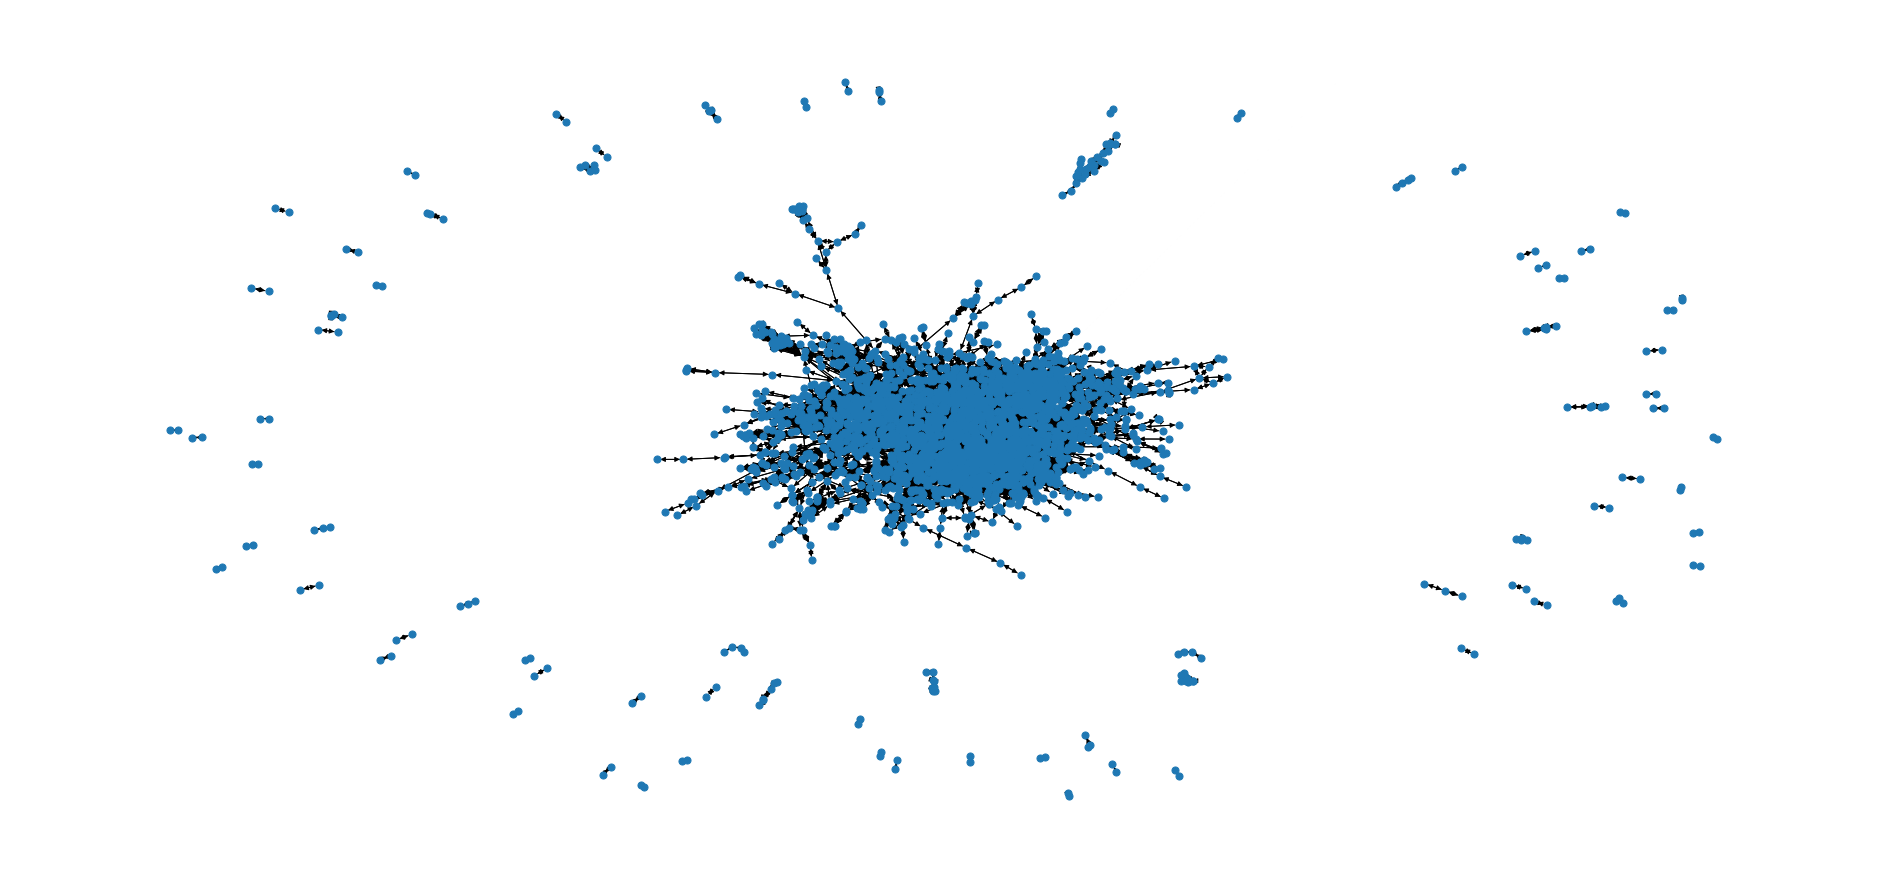

In [12]:
plot_graph(graph)

In [22]:
def get_k_hop_neihgbors(target, adj, level):
    a = torch.matrix_power(adj, level)
    neighors = torch.nonzero(a[target], as_tuple=False).flatten()
    
    return neighors

In [35]:
def plot_k_neighbors(graph, target, adj, level):
    gnx = graph.to_networkx().to_undirected()
    
    neighbors = get_k_hop_neihgbors(target, adj, level)
    node_colors = []
    
    for node in gnx.nodes():
        if node == target:
            node_colors.append('darkorange')
        elif node in neighbors:
            node_colors.append('crimson')
        else:
            node_colors.append('royalblue')
            
    plt.figure(figsize=(26, 12))
    plt.title('What each node in GCN sees for {} layers'.format(level))
    nx.draw(gnx, node_size=60, node_color=node_colors)
    plt.savefig('../images/gcn-{}-layers.png'.format(level))
    plt.show()

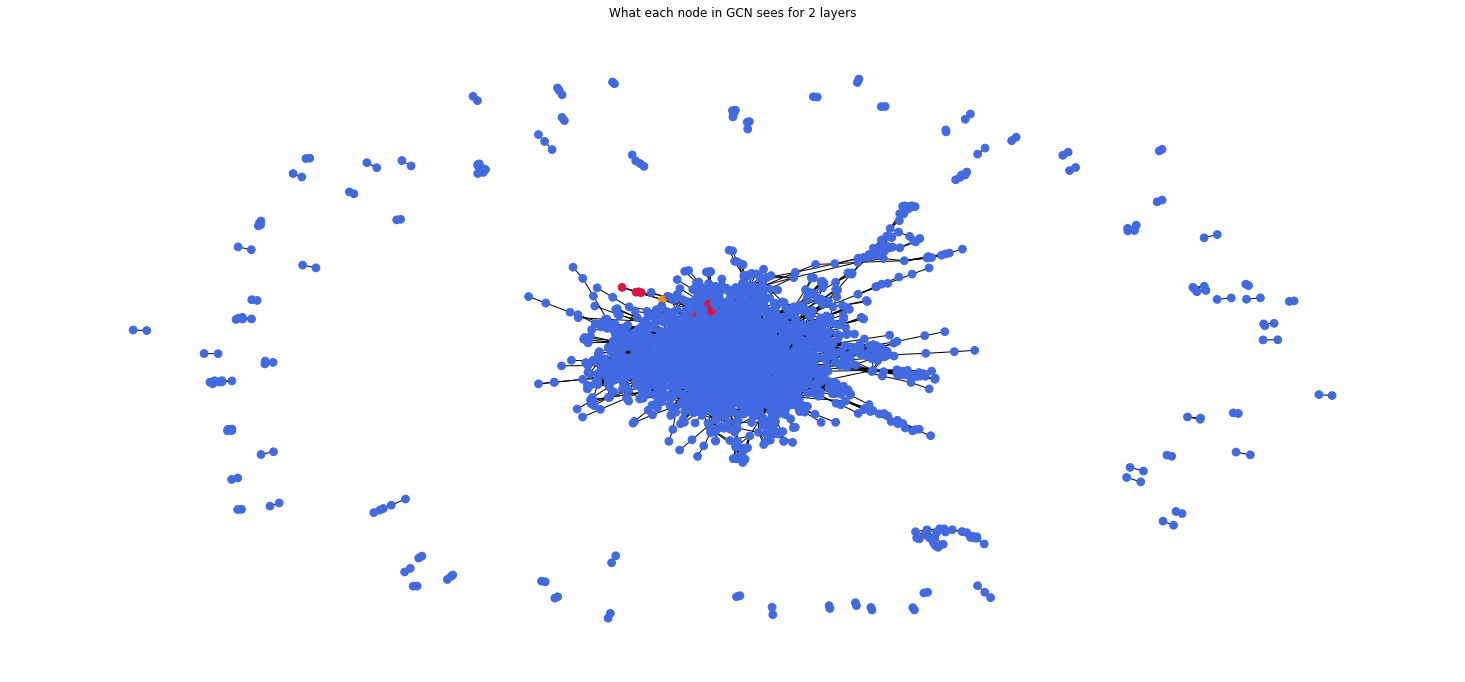

In [36]:
plot_k_neighbors(graph, target=450, adj=A, level=2)

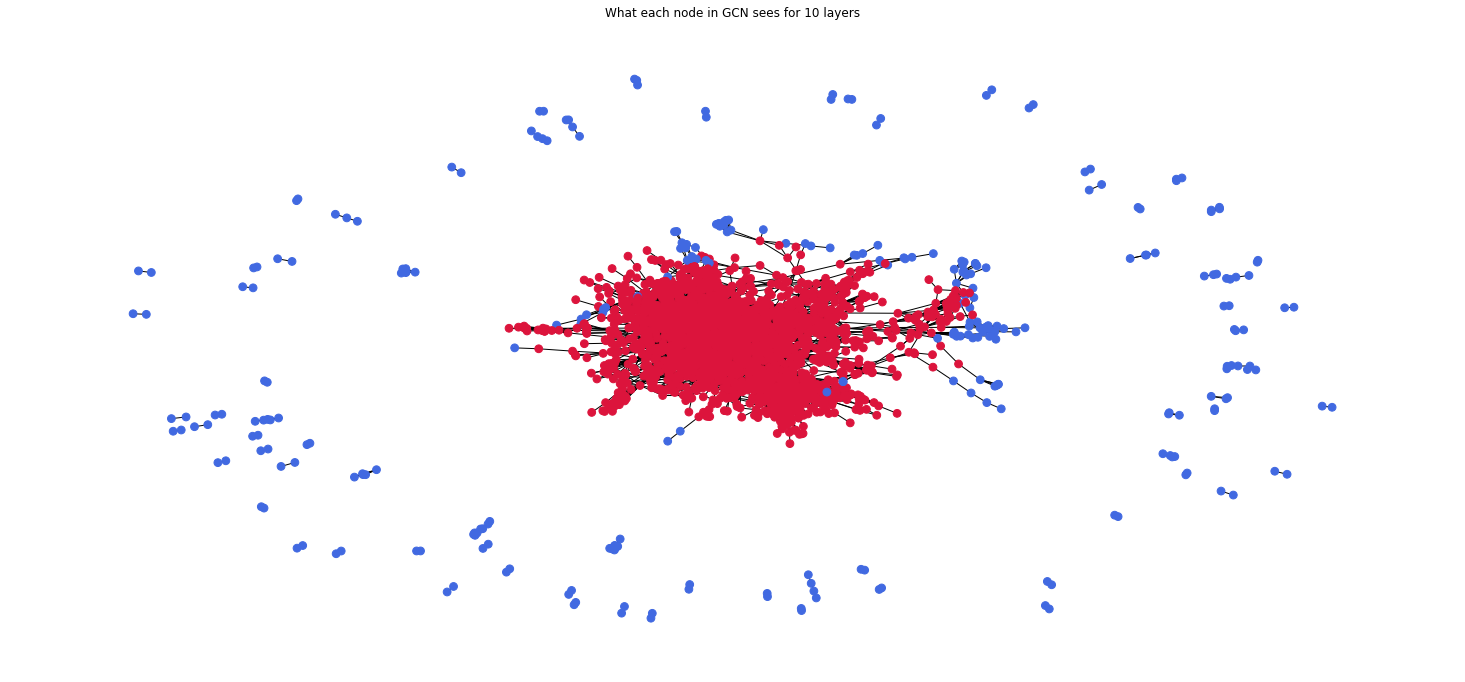

In [37]:
plot_k_neighbors(graph, target=450, adj=A, level=10)